## Bu çalışmada temel veri analizi yapılmıştır ve OneHotEncoder ve get_dummies fonksiyonu kullanılarak kategorik değişkenleri dönüştürme işlemleri gösterilmiştir. OneHotEncoder, kategorik değişkenleri her kategori için ayrı bir sütun açarak 0/1 formatında kodlar. get_dummies fonksiyonu ise pandas kütüphanesinde benzer şekilde kategorik değişkenleri dönüştürür. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv("academic Stress level - maintainance 1.csv")

## Timestamp : Zaman Bilgisi
## Your Academic Stage : Bu özellik lise, üniversite lisans ve lisansüstü gibi değerlere sahip. Akademik durum bu veride etkili bir bilgi olabilir.
## Peer Pressure : Akran baskısı feature'ı 1'den 5'e kadar değerler alabilir. Kıskançlık, kıyas yapma gibi durumlarda akran baskısı öğrencinin mental sağlığını etkiler. 
## Academic pressure from your home : Bu feature da 1 ve 5 arası değerler alabilir. Toplumumuzda ev halkından gelen baskı öğrencinin akademik hayatını olumsuz etkiler.
## Study Environment : Çalışma ortamı peaceful(huzurlu,sakin), noisy(gürültülü) ve disrupted(altüst olmuş anlamında) değerlerine sahiptir. Huzurlu ve düzenli bir çalışma masası, en verimli çalışma yöntemlerini sunar ve öğrenci için düzenli bir zihin yapısı oluşturur. Aksine, gürültülü ve dağınık bir masa genellikle öğrencinin akademik zihniyetini bozarak stresi artırır.
## What coping strategy you use as a student? : Öğrenci olarak bu sorunla başa çıkmak için hangi stratejiyi kullanıyorsunuz sorusuna 3 şekilde cevap verilmiştir: problemi entelektüel olarak analiz etme, duygusal çöküntü veya sosyal destek. Bu konunun arkasındaki sebep, öğrencinin duygusal zekasının kaynağını tanımlamaktır.
## Do you have any bad habits like smoking, drinking on a daily basis? : Bu özellik, öğrencinin stres atma yöntemini öğrenmek için eklenmiştir. Öğrenci sigara, alkol vb. gibi kötü alışkanlıklara ne kadar çok yönelirse, stresinin atılma olasılığı o kadar azalır.
## What would you rate the academic competition in your student life : Bu özelliğin tek bir amacı var: öğrenciler arasında stresi büyük ölçüde artıran akademik rekabeti sağlamak.
## Rate your academic stress index : Öğrencinin akademik stres oranını tanımlayan ve 1-5 arası değerler alabilen target variable.

In [3]:
df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [4]:
df.shape

(140, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

In [6]:
df.isnull().sum()

Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      1
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Peer pressure,140.0,3.071429,1.083844,1.0,2.0,3.0,4.0,5.0
Academic pressure from your home,140.0,3.178571,1.276618,1.0,2.0,3.0,4.0,5.0
What would you rate the academic competition in your student life,140.0,3.492857,1.028349,1.0,3.0,4.0,4.0,5.0
Rate your academic stress index,140.0,3.721429,1.032339,1.0,3.0,4.0,4.0,5.0


## Timestamp yani zaman bilgisi çoğu veride aynı veya birbirine çok yakın tarihler olduğu için drop ettim.

In [8]:
df.drop("Timestamp",axis=1,inplace=True)

In [9]:
df.head()

,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [10]:
df["Your Academic Stage"].value_counts()

Your Academic Stage
undergraduate    100
high school       29
post-graduate     11
Name: count, dtype: int64

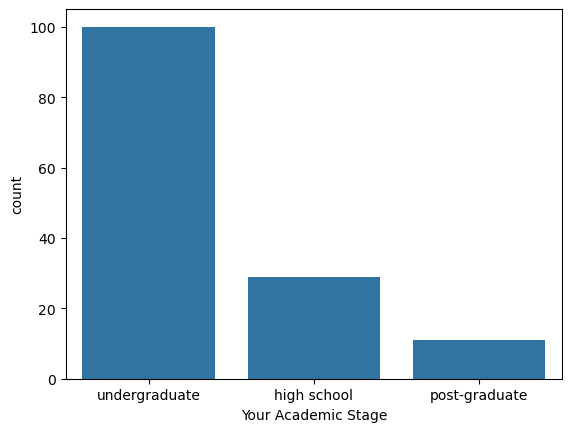

In [11]:
sns.countplot(x=df["Your Academic Stage"])
plt.show()

In [12]:
df.groupby("Rate your academic stress index ")["Your Academic Stage"].value_counts()

Rate your academic stress index   Your Academic Stage
1                                 undergraduate           4
                                  high school             2
2                                 undergraduate           8
                                  high school             1
3                                 undergraduate          26
                                  high school             6
                                  post-graduate           4
4                                 undergraduate          39
                                  high school            11
                                  post-graduate           6
5                                 undergraduate          23
                                  high school             9
                                  post-graduate           1
Name: count, dtype: int64

## Burada Your Academic Stage sütununu OneHotEncoder ile encode ettik. OneHotEncoder her kategori için ayrı bir sütun açar. Bu sayede model her kategoriyi eşit ve bağımsız olarak görür.  

In [13]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore") # sparse_output=False numpy arrayı döndürür. 
# handle_unknown="ignore" test setinde hiç görülmeyen yeni bir kategori gelse bile hata vermez.

In [14]:
encoded = ohe.fit_transform(df[["Your Academic Stage"]]) # Sütunu encode etme

In [15]:
encoded_cols = ohe.get_feature_names_out(["Your Academic Stage"]) # Feature isimlerini alma

In [16]:
df_encoded = pd.DataFrame(encoded, columns=encoded_cols, index=df.index) # Dataframe'e ekleme
df_guncel = pd.concat([df.drop("Your Academic Stage", axis=1), df_encoded], axis=1) # Orijinal dataframe ile birleştirme 

In [17]:
df_guncel.head()

,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index,Your Academic Stage_high school,Your Academic Stage_post-graduate,Your Academic Stage_undergraduate
0,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5,0.0,0.0,1.0
1,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3,0.0,0.0,1.0
2,1,1,Peaceful,"Social support (friends, family)",No,2,4,0.0,0.0,1.0
3,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3,0.0,0.0,1.0
4,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5,0.0,0.0,1.0


In [18]:
df_guncel.columns

Index(['Peer pressure', 'Academic pressure from your home',
       'Study Environment', 'What coping strategy you use as a student?',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index ', 'Your Academic Stage_high school',
       'Your Academic Stage_post-graduate',
       'Your Academic Stage_undergraduate'],
      dtype='object')

In [19]:
df_guncel["Study Environment"].value_counts()

Study Environment
Peaceful     69
disrupted    38
Noisy        32
Name: count, dtype: int64

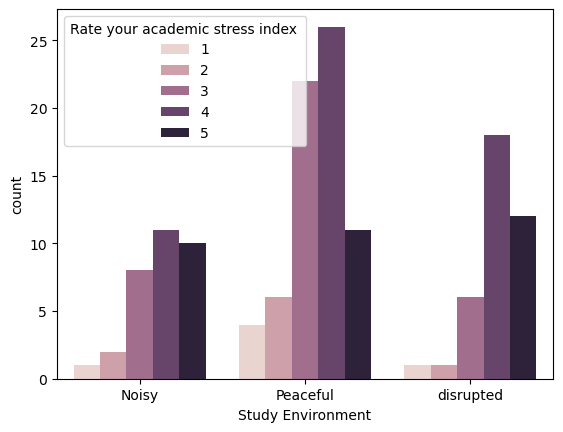

In [20]:
sns.countplot(x="Study Environment",data=df_guncel,hue="Rate your academic stress index ")
plt.show()

## Study Environment sütununda 1 tane boş değer (nan) var , veri seti küçük olduğu için boş değer olan satırı silmek yerine en çok görülen değerle doldurma (mode imputation) yolunu tercih ettim.

In [21]:
df_guncel["Study Environment"].isnull().sum()

1

In [22]:
most_common = df_guncel["Study Environment"].mode()[0]

In [23]:
df_guncel["Study Environment"] = df_guncel["Study Environment"].fillna(most_common)

In [24]:
df_guncel["Study Environment"].isnull().sum()

0

In [25]:
df_guncel["Study Environment"].unique()

array(['Noisy', 'Peaceful', 'disrupted'], dtype=object)

## Study Environment sütunu da Your Academic Stage sütunu gibi 3 farklı değer alabildiğinden yine OneHotEncoder uyguladım. 

In [26]:
encoded = ohe.fit_transform(df_guncel[["Study Environment"]])

In [27]:
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(["Study Environment"])) # Yeni sütun isimlerini alma

In [28]:
df = pd.concat([df_guncel.drop("Study Environment", axis=1), encoded_df], axis=1) # Eski sütunu atıp yenisini ekleme

In [29]:
df.head()

,Peer pressure,Academic pressure from your home,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index,Your Academic Stage_high school,Your Academic Stage_post-graduate,Your Academic Stage_undergraduate,Study Environment_Noisy,Study Environment_Peaceful,Study Environment_disrupted
0,4,5,Analyze the situation and handle it with intel...,No,3,5,0.0,0.0,1.0,1.0,0.0,0.0
1,3,4,Analyze the situation and handle it with intel...,No,3,3,0.0,0.0,1.0,0.0,1.0,0.0
2,1,1,"Social support (friends, family)",No,2,4,0.0,0.0,1.0,0.0,1.0,0.0
3,3,2,Analyze the situation and handle it with intel...,No,4,3,0.0,0.0,1.0,0.0,1.0,0.0
4,3,3,Analyze the situation and handle it with intel...,No,4,5,0.0,0.0,1.0,0.0,1.0,0.0


In [30]:
df["What coping strategy you use as a student?"].value_counts()

What coping strategy you use as a student?
Analyze the situation and handle it with intellect    87
Emotional breakdown (crying a lot)                    32
Social support (friends, family)                      21
Name: count, dtype: int64

In [31]:
df.groupby("Rate your academic stress index ")["What coping strategy you use as a student?"].value_counts()

Rate your academic stress index   What coping strategy you use as a student?        
1                                 Analyze the situation and handle it with intellect     4
                                  Emotional breakdown (crying a lot)                     1
                                  Social support (friends, family)                       1
2                                 Analyze the situation and handle it with intellect     5
                                  Emotional breakdown (crying a lot)                     3
                                  Social support (friends, family)                       1
3                                 Analyze the situation and handle it with intellect    24
                                  Emotional breakdown (crying a lot)                     6
                                  Social support (friends, family)                       6
4                                 Analyze the situation and handle it with intellect    39
     

In [32]:
df["What coping strategy you use as a student?"].unique()

array(['Analyze the situation and handle it with intellect',
       'Social support (friends, family)',
       'Emotional breakdown (crying a lot)'], dtype=object)

## Öğrenci olarak stresle başa çıkmak için nasıl bir strateji kullanıyorsunuz sorusuna 3 tane farklı cevap verildiği için nominal yani sırasız bir kategorik değişken olduğundan OneHotEncoder ile encode ettim. 

In [33]:
encoded=ohe.fit_transform(df[["What coping strategy you use as a student?"]])

In [34]:
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(["What coping strategy you use as a student?"]))

In [35]:
df = pd.concat([df.drop("What coping strategy you use as a student?", axis=1), encoded_df], axis=1)

In [36]:
df.head()

,Peer pressure,Academic pressure from your home,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index,Your Academic Stage_high school,Your Academic Stage_post-graduate,Your Academic Stage_undergraduate,Study Environment_Noisy,Study Environment_Peaceful,Study Environment_disrupted,What coping strategy you use as a student?_Analyze the situation and handle it with intellect,What coping strategy you use as a student?_Emotional breakdown (crying a lot),"What coping strategy you use as a student?_Social support (friends, family)"
0,4,5,No,3,5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3,4,No,3,3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,1,No,2,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,2,No,4,3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3,3,No,4,5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [37]:
df["Do you have any bad habits like smoking, drinking on a daily basis?"].unique()

array(['No', 'prefer not to say', 'Yes'], dtype=object)

In [38]:
df["Do you have any bad habits like smoking, drinking on a daily basis?"].value_counts()

Do you have any bad habits like smoking, drinking on a daily basis?
No                   123
Yes                   10
prefer not to say      7
Name: count, dtype: int64

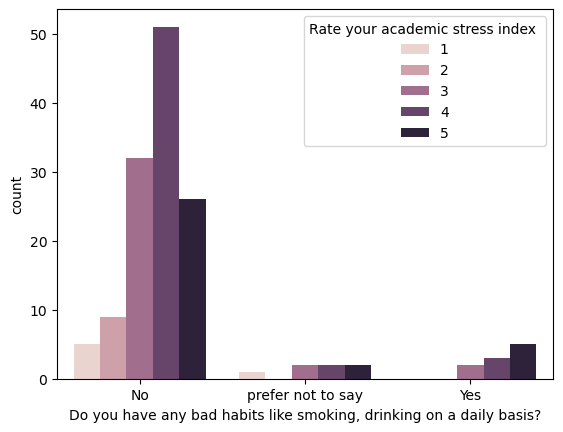

In [39]:
sns.countplot(x="Do you have any bad habits like smoking, drinking on a daily basis?",data=df,hue="Rate your academic stress index ")
plt.show()

## Öğrencilerin herhangi bir kötü alışkanlığının olup olmadığını belirleyen sütunda yes, no ve prefer not to say olarak 3 tane değer var. Burada pd.get_dummies() fonksiyonunu kullandım. get_dummies() her kategori için ayrı bir sütun açar. Özellikle OneHotEncoder gibi ek fit-transform işlemleriyle uğraşmak istemediğimizde pratik bir çözümdür. Küçük veri setlerinde hızlı ve kolayca uygulanabilir.

In [40]:
df = pd.get_dummies(df,columns=["Do you have any bad habits like smoking, drinking on a daily basis?"],prefix="BadHabits")

In [41]:
df.columns

Index(['Peer pressure', 'Academic pressure from your home',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index ', 'Your Academic Stage_high school',
       'Your Academic Stage_post-graduate',
       'Your Academic Stage_undergraduate', 'Study Environment_Noisy',
       'Study Environment_Peaceful', 'Study Environment_disrupted',
       'What coping strategy you use as a student?_Analyze the situation and handle it with intellect',
       'What coping strategy you use as a student?_Emotional breakdown (crying a lot)',
       'What coping strategy you use as a student?_Social support (friends, family)',
       'BadHabits_No', 'BadHabits_Yes', 'BadHabits_prefer not to say'],
      dtype='object')

In [42]:
df.head()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index,Your Academic Stage_high school,Your Academic Stage_post-graduate,Your Academic Stage_undergraduate,Study Environment_Noisy,Study Environment_Peaceful,Study Environment_disrupted,What coping strategy you use as a student?_Analyze the situation and handle it with intellect,What coping strategy you use as a student?_Emotional breakdown (crying a lot),"What coping strategy you use as a student?_Social support (friends, family)",BadHabits_No,BadHabits_Yes,BadHabits_prefer not to say
0,4,5,3,5,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,True,False,False
1,3,4,3,3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,True,False,False
2,1,1,2,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,True,False,False
3,3,2,4,3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,True,False,False
4,3,3,4,5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,True,False,False
